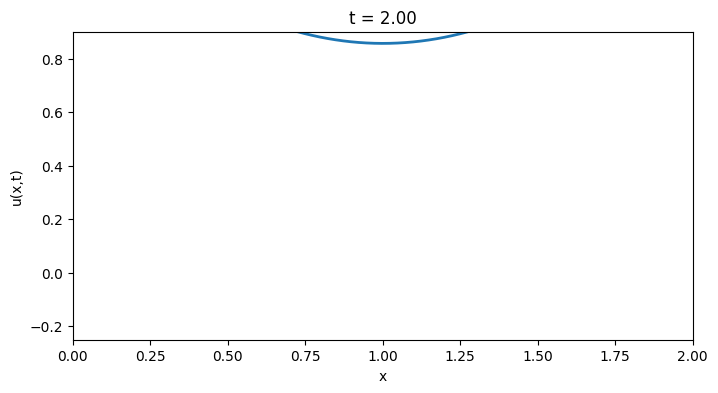

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
##napiši svojo pot
pot = "napiši svojo pot"
#št. sličic
frames = 120
#x-os
x = np.linspace(0, 2.0, 400)
#n-ji
lihi_n = np.arange(1, 2 * 41, 2)

#okno
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 2.0)
ax.set_ylim(-0.25, 0.9)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
title = ax.set_title('')

#u(x,t)
def odmik(t):
    #posebni primer za lambda0 in omega0
    u = 0.5 * t  
    for n in lihi_n:
        coef = -8.0 / (np.sqrt(3.0) * np.pi**3 * n**3)
        u += coef * np.sin(np.sqrt(3.0) * n * np.pi * t) * np.cos(n * np.pi * x)
    return u

#animacija
def init():
    line.set_data([], [])
    title.set_text('')
    return line, title

#posodobi funkcijo
def update(frame):
    t = (frame / (frames - 1)) * 2.0
    u = odmik(t)
    line.set_data(x, u)
    title.set_text(f't = {t:.2f}')
    return line, title

#ustvari aniamacijo
anim = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

#shrani animacijo
anim.save(pot, writer=FFMpegWriter(fps=30, codec='libx264', bitrate=-1))
